In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Importing data
data_x = np.genfromtxt('../data/q4/q4x.dat', delimiter='  ')
data_y = np.genfromtxt('../data/q4/q4y.dat', dtype='str')

#Segregating the two different classes, storing their indices
alaska = np.argwhere(data_y=='Alaska')[:,0]
canada = np.argwhere(data_y=='Canada')[:,0]
data_y = np.zeros(data_y.shape[0])

#Setting y values of classes to 0 or 1 based on their class 
data_y[alaska] = 0
data_y[canada] = 1
data_y = data_y.reshape(-1,1)

#Normalizing the vector data_X
mean = np.mean(data_x, axis = 0).reshape(1,-1)
std = np.std(data_x, axis = 0).reshape(1,-1)
data_x = (data_x-mean)/std #normalized data_x

#size of dataset
(m,n) = data_x.shape

In [2]:
#Count of data in two different classes and then calculating value of phi since y is bernoulli distributed
count_alaska = alaska.shape[0]
count_canada = canada.shape[0]
phi = (count_canada)/(count_alaska + count_canada)

#Storing data of two classes differently
alaska_x = data_x[alaska]
canada_x = data_x[canada]

#Calculating mean of two different classes
mu0 = np.mean(alaska_x, axis=0)
mu1 = np.mean(canada_x, axis=0)

#Calculating covariance for class 0
eps0 = np.zeros((n,n))
for x in alaska_x:
    e = (x-mu0).reshape(-1,1)
    eps0 = eps0 + np.matmul(e,e.T)
eps0 = eps0/(count_alaska)

#Calculating covariance for class 1
eps1 = np.zeros((n,n))
for x in canada_x:
    e = (x-mu1).reshape(-1,1)
    eps1 = eps1 + np.matmul(e,e.T)
eps1 = eps1/(count_canada)

# Calculating covariance of entire data together, assuming they have same covariance i.e. sigma=sigma0=sigma1
eps = (count_alaska*eps0 + count_canada*eps1)/(count_canada + count_alaska)

In [3]:
#Part (a), The corresponding values of parameters
print("Phi= ", phi, "\n") 
print("Mu0= ", mu0)
print("Mu1= ", mu1, "\n")
print("Covariance Matrix:")
print(eps)

Phi=  0.5 

Mu0=  [-0.75529433  0.68509431]
Mu1=  [ 0.75529433 -0.68509431] 

Covariance Matrix:
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


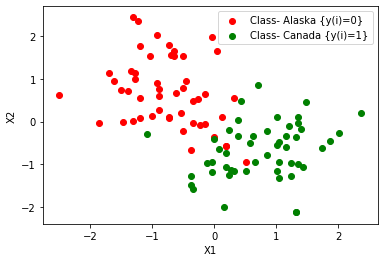

In [4]:
#part b, plotting the data, labelling them in different classes
plt.figure(1)
plt.scatter(alaska_x[:,0], alaska_x[:,1], c="red", label='Class- Alaska {y(i)=0}')
plt.scatter(canada_x[:,0], canada_x[:,1], c="green", label='Class- Canada {y(i)=1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

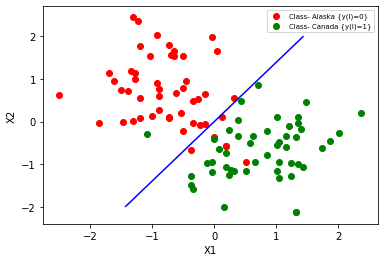

Equation of linear decision boundary is:
-3.642189162864482e-16  +  -1.3898453073976291 x +  y = 0


In [5]:
#part c, calculating linear decision boundary and plotting it
plt.figure(2)
plt.scatter(alaska_x[:,0], alaska_x[:,1], c="red", label='Class- Alaska {y(i)=0}')
plt.scatter(canada_x[:,0], canada_x[:,1], c="green", label='Class- Canada {y(i)=1}')
plt.xlabel('X1')
plt.ylabel('X2')

mu1 = mu1.reshape(1,-1)
mu0 = mu0.reshape(1,-1)

epsinv = np.linalg.pinv(eps)
mu1_mu0 = (mu1-mu0).reshape(1,-1)

#The coefficients obtained from the GDA equation on solving p(y=1/x;theta) = p(y=0/x;theta) 
a = np.matmul(epsinv,mu1_mu0.T)
b = np.matmul(mu1_mu0,epsinv)
c = np.matmul(np.matmul(mu0, epsinv), mu0.T) - np.matmul(np.matmul(mu1, epsinv), mu1.T)
c = c[0][0]
d = 2*(math.log(phi)-math.log(1-phi))

#Plotting the decision boundary
x = np.linspace(-1.5,1.5,100)
y = np.linspace(-2, 2, 100)

x,y = np.meshgrid(x,y)
plt.contour(x,y,(d+c+(a[0][0]+b[0][0])*x+(a[1][0]+b[0][1])*y),[0], colors='b')
plt.legend(loc='upper right', fontsize=7)
plt.show()

#The equation for the given boundary
print("Equation of linear decision boundary is:")
print((d+c)/(a[1][0]+b[0][1])," + ",(a[0][0]+b[0][0])/(a[1][0]+b[0][1]),"x + ","y = 0")

In [6]:
#Part d, reporting the values of calculated parameters
print("Mu0= ", mu0)
print("Mu1= ", mu1, "\n")
print("Covariance Matrix (Sigma0):")
print(eps0, "\n")
print("Covariance Matrix (Sigma1):")
print(eps1)

Mu0=  [[-0.75529433  0.68509431]]
Mu1=  [[ 0.75529433 -0.68509431]] 

Covariance Matrix (Sigma0):
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]] 

Covariance Matrix (Sigma1):
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


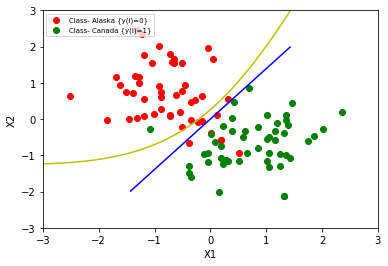

The equation for Conic section is:
0.6713477993632311 x1^2 +  2.573672673313772 x1x2 +  -0.8659319806217882 x2^2 +  7.615706387080971 x1 +  -5.71934612537374 x2 +  1.4479931143547868  = 0


In [7]:
#Part e, calculating quadratic decision boundary and plotting it
plt.figure(3)
plt.scatter(alaska_x[:,0], alaska_x[:,1], c="red", label='Class- Alaska {y(i)=0}')
plt.scatter(canada_x[:,0], canada_x[:,1], c="green", label='Class- Canada {y(i)=1}')
plt.xlabel('X1')
plt.ylabel('X2')
#The linear decision boundary calculated above
plt.contour(x,y,(d+c+(a[0][0]+b[0][0])*x+(a[1][0]+b[0][1])*y),[0], colors='b')

#Taking inverse of covariance matrices
eps0inv = np.linalg.pinv(eps0)
eps1inv = np.linalg.pinv(eps1)

#The coefficients obtained from the GDA equation on solving p(y=1/x;theta) = p(y=0/x;theta)
a = np.matmul(eps1inv, mu1.T)
a_p = np.matmul(mu1, eps1inv)
a_p = a_p.T

b = np.matmul(eps0inv, mu0.T)
b_p = np.matmul(mu0, eps0inv)
b_p = b_p.T

c = np.matmul(np.matmul(mu1, eps1inv), mu1.T) - np.matmul(np.matmul(mu0, eps0inv), mu0.T)
c = c[0][0]

det0, det1 = np.linalg.det(eps0), np.linalg.det(eps1)
d = (math.log(phi)-math.log(1-phi)) + 0.5*(math.log(det0) - math.log(det1))

lincoeff= a + a_p - b - b_p

quad = eps0inv - eps1inv
a1, b1, c1, d1 = quad[0][0], quad[0][1], quad[1][0], quad[1][1]
lamb, delta = lincoeff[0][0], lincoeff[1][0]

#Plotting the decision boundary
x1 = np.linspace(-3, 3, 400)
x2 = np.linspace(-3, 3, 400)
x1, x2 = np.meshgrid(x1, x2)
plt.contour(x1, x2, ((a1*x1*x1 + (c1+b1)*x1*x2 + d1*x2*x2 + lamb*x1 + delta*x2 + c)*0.5 + d), [0], colors='y')
plt.legend(loc='upper left', fontsize=7)
plt.show()

#The equation for the given boundary
print("The equation for Conic section is:")
print(a1,"x1^2 + ",(c1+b1),"x1x2 + ",d1,"x2^2 + ",lamb,"x1 + ",delta,"x2 + ",(c+d)," = 0")